In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 
%matplotlib inline

In [2]:
df = pd.read_csv('wine.data')
df.columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [3]:
df.tail()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
176,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [4]:
X = df.iloc[:, 1:].values
Y = df.iloc[:, 0].values

In [5]:
X

array([[1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, ..., 8.600e-01, 3.450e+00,
        1.480e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [6]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3], dtype=int64)

In [7]:
X_std = StandardScaler().fit_transform(X)

In [8]:
X_std

array([[ 0.2558245 , -0.50162433, -0.8244853 , ...,  0.40709978,
         1.13169801,  0.97105248],
       [ 0.20622873,  0.01802001,  1.10768971, ...,  0.3195674 ,
         0.80457911,  1.40099798],
       [ 1.70650069, -0.34931478,  0.48793547, ..., -0.4244579 ,
         1.20281081,  2.34050852],
       ...,
       [ 0.34261709,  1.73822194, -0.38701171, ..., -1.60614514,
        -1.48525319,  0.28632445],
       [ 0.21862767,  0.22408586,  0.01400575, ..., -1.56237895,
        -1.39991783,  0.30224836],
       [ 1.40892609,  1.57695301,  1.36288264, ..., -1.51861275,
        -1.42836295, -0.58949046]])

In [9]:
features = df.iloc[:, 1:].columns
print(features)
pca = PCA(0.95)
# pca = PCA(n_components=2)

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')


In [10]:
principalComponents = pca.fit_transform(X_std) 
principalComponents

array([[ 2.23024297,  0.30231277, -2.03292031, ...,  1.02647007,
        -0.31314531,  0.13125611],
       [ 2.53192196, -1.06225676,  0.97672434, ..., -0.33561119,
        -1.17906874,  0.0067524 ],
       [ 3.75467731, -2.80530871, -0.18037013, ...,  0.64684738,
         0.06790635,  0.37331985],
       ...,
       [-2.69214577, -2.73987492, -0.92311154, ...,  0.05264208,
         0.02880258, -0.17316281],
       [-2.39839363, -2.27992875, -0.53748142, ...,  0.38910371,
         0.0323141 ,  0.54111989],
       [-3.21585159, -2.74059303,  1.01246947, ..., -0.29575706,
         0.74233642, -0.09684921]])

In [11]:
principalDf = pd.DataFrame(data = principalComponents)

In [12]:
principalDf.head(5) # prints the top 5 rows

,0,1,2,3,4,5,6,7,8,9
0,2.230243,0.302313,-2.032920,-0.281906,-0.259540,-0.927615,0.079724,1.026470,-0.313145,0.131256
1,2.531922,-1.062257,0.976724,0.735727,-0.198602,0.557252,0.432350,-0.335611,-1.179069,0.006752
2,3.754677,-2.805309,-0.180370,0.577125,-0.257871,0.100109,-0.364924,0.646847,0.067906,0.373320
3,1.020131,-0.888380,2.023870,-0.432792,0.275235,-0.403139,0.454721,0.412033,0.338059,-0.096320
4,3.049199,-2.170007,-0.638747,-0.487628,-0.631358,0.130817,0.421297,0.398731,-0.113454,-0.020025


In [13]:
import plotly.express as px
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
fig = px.scatter_matrix(
    principalComponents,
    labels=labels,
    dimensions=range(4),
    color=df["Class"],
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [14]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)


In [15]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [16]:
class KMeans:
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # mean feature vector for each cluster
        self.centroids = []


    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # initialize
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # optimize clusters
        for _ in range(self.max_iters):
            # update clusters
            self.clusters = self._create_clusters(self.centroids)
            # if self.plot_steps:
            #     self.plot()

            # update centroids
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            # if self.plot_steps:
            #     self.plot()

            # check if converged
            if self._is_converged(centroids_old, self.centroids):
                break

            # return cluster labels
        return self._get_cluster_labels(self.clusters)
    
    def _get_cluster_labels(self, clusters):
        y_pred = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx
        return y_pred

    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx
    
    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))
        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)
        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=2)
        plt.show()

In [17]:
kmeans = KMeans(K=8, max_iters=150, plot_steps=True)
y_pred = kmeans.predict(principalComponents)
# kmeans.plot()
y_pred

array([1., 3., 3., 5., 3., 3., 5., 3., 3., 3., 1., 3., 3., 3., 5., 5., 5.,
       3., 1., 3., 1., 1., 1., 1., 5., 1., 1., 5., 1., 5., 3., 1., 5., 5.,
       1., 5., 1., 1., 1., 3., 1., 3., 1., 1., 1., 3., 3., 3., 3., 3., 3.,
       3., 5., 1., 3., 3., 3., 3., 4., 4., 4., 4., 6., 4., 6., 1., 6., 4.,
       0., 2., 6., 6., 5., 6., 4., 4., 2., 0., 6., 6., 6., 6., 2., 6., 6.,
       6., 6., 2., 6., 2., 2., 2., 6., 6., 0., 6., 6., 6., 6., 4., 4., 6.,
       6., 6., 2., 6., 2., 6., 6., 0., 6., 2., 6., 6., 6., 6., 6., 2., 6.,
       6., 5., 6., 6., 6., 6., 6., 2., 6., 2., 4., 7., 7., 7., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 2., 2., 7., 7., 7., 7., 7., 7., 7., 2.,
       7., 7., 7., 7., 7., 7., 7.])

In [18]:
# normalised mutual information (NMI) is a measure of the mutual dependence between two variables
# from sklearn.metrics.cluster import normalized_mutual_info_score
def computeMI(x, y):
    sum_mi = 0.0
    x_value_list = np.unique(x)
    y_value_list = np.unique(y)
    Px = np.array([ len(x[x==xval])/float(len(x)) for xval in x_value_list ]) #P(x)
    Py = np.array([ len(y[y==yval])/float(len(y)) for yval in y_value_list ]) #P(y)
    for i in range(len(x_value_list)):
        if Px[i] ==0.:
            continue
        sy = y[x == x_value_list[i]]
        if len(sy)== 0:
            continue
        pxy = np.array([len(sy[sy==yval])/float(len(y))  for yval in y_value_list]) #p(x,y)
        t = pxy[Py>0.]/Py[Py>0.] /Px[i] # log(P(x,y)/( P(x)*P(y))
        sum_mi += sum(pxy[t>0]*np.log2( t[t>0]) ) # sum ( P(x,y)* log(P(x,y)/( P(x)*P(y)) )
    return sum_mi
def normalized_mutual_info_score(x, y):
    mi = computeMI(x, y)
    h_x = computeMI(x, x)
    h_y = computeMI(y, y)
    return 2.*mi/(h_x+h_y)
normalized_mutual_info_score(Y, y_pred)


0.6032522211713558

K =  2 NMI =  0.5009518839266447
K =  3 NMI =  0.8466560349974127
K =  4 NMI =  0.7562638404199211
K =  5 NMI =  0.7827181004675223
K =  6 NMI =  0.7785831630789795
K =  7 NMI =  0.597538045192102
K =  8 NMI =  0.5636904064039172
Best K =  3 Best NMI =  0.8466560349974127


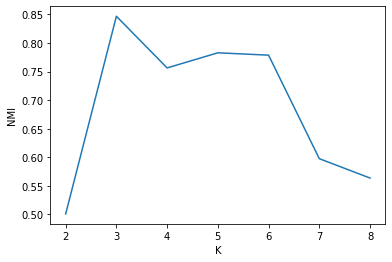

In [19]:
# Vary the value of K from 2 to 8. Plot the graph of K vs normalised mutual information (NMI)
NMI = []
best_K = 0
best_NMI = 0
for i in range(2, 9):
    kmeans = KMeans(K=i, max_iters=150, plot_steps=True)
    y_pred = kmeans.predict(principalComponents)
    print("K = ", i, "NMI = ", normalized_mutual_info_score(Y, y_pred))
    NMI.append(normalized_mutual_info_score(Y, y_pred))
    best_K = i if normalized_mutual_info_score(Y, y_pred) > best_NMI else best_K
    best_NMI = normalized_mutual_info_score(Y, y_pred) if normalized_mutual_info_score(Y, y_pred) > best_NMI else best_NMI

print("Best K = ", best_K, "Best NMI = ", best_NMI)
plt.plot(range(2, 9), NMI)
plt.xlabel("K")
plt.ylabel("NMI")
plt.show()
   